In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('car_price.csv')
print(df.shape)
display(df.head())

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
print(df.isna().mean().round(4)*100)
df = df.dropna()
print("After dropping nan")
print(df.isna().mean().round(4)*100)

name             0.00
year             0.00
selling_price    0.00
km_driven        0.00
fuel             0.00
seller_type      0.00
transmission     0.00
owner            0.00
mileage          2.72
engine           2.72
max_power        2.65
torque           2.73
seats            2.72
dtype: float64
After dropping nan
name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
torque           0.0
seats            0.0
dtype: float64


In [4]:
print("$$ Year $$")
display(df.year.value_counts())
print("\n$$ Owner $$\n")
display(df.owner.value_counts())
print("\n$$ Number of Seats $$\n")
display(df.seats.value_counts())

$$ Year $$


2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1997       9
1998       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64


$$ Owner $$



First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64


$$ Number of Seats $$



5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [5]:
df = df[df.owner != 'Test Drive Car']
df = df[df.seats != 14.0]
df = df[df.seats != 2.0]
df = df[df.year != 1983]
df = df[df.year != 1991]
df = df[df.year != 1994]
df = df[df.year != 1995]
df = df[df.year != 1996]
df = df[df.owner != 'Test Drive Car']
df = df[df.selling_price < 3000000]
df = df[df.km_driven < 1500000]
df['name'] = df['name'].apply(lambda x: ' '.join(x.split(' ')[0:1]))

In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
df['mileage'] = df['mileage'].map(lambda x: x.rstrip('kmpl'))
df['mileage'] = df['mileage'].map(lambda x: float(x.rstrip('km/kg'))*0.8)
df['engine'] = df['engine'].map(lambda x: x.rstrip('CC'))
df['max_power'] = df['max_power'].map(lambda x: x.rstrip('bph'))
df.drop(['torque'], axis = 1, inplace = True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,18.720,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,16.912,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,14.160,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,18.400,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,12.880,1298,88.2,5.0


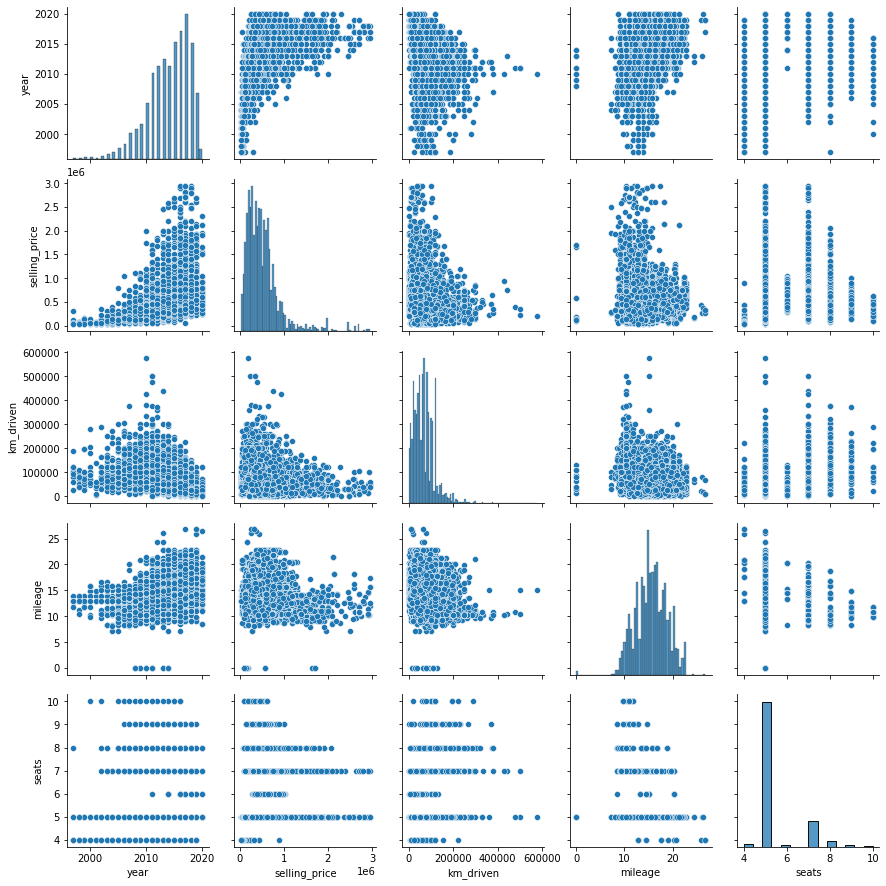

In [8]:
sns.pairplot(df)

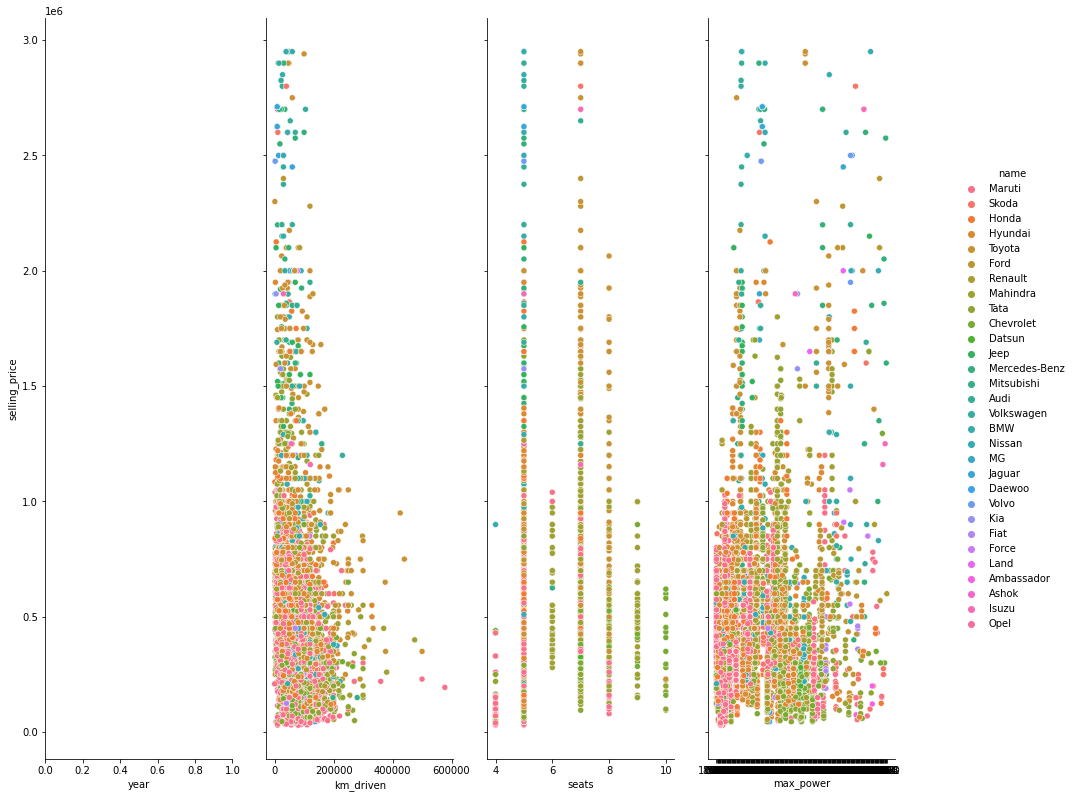

In [9]:
g = sns.pairplot(df, x_vars = ["year","km_driven", "seats", "max_power"], y_vars = ["selling_price"], hue = 'name')
g.fig.set_size_inches(15,15)

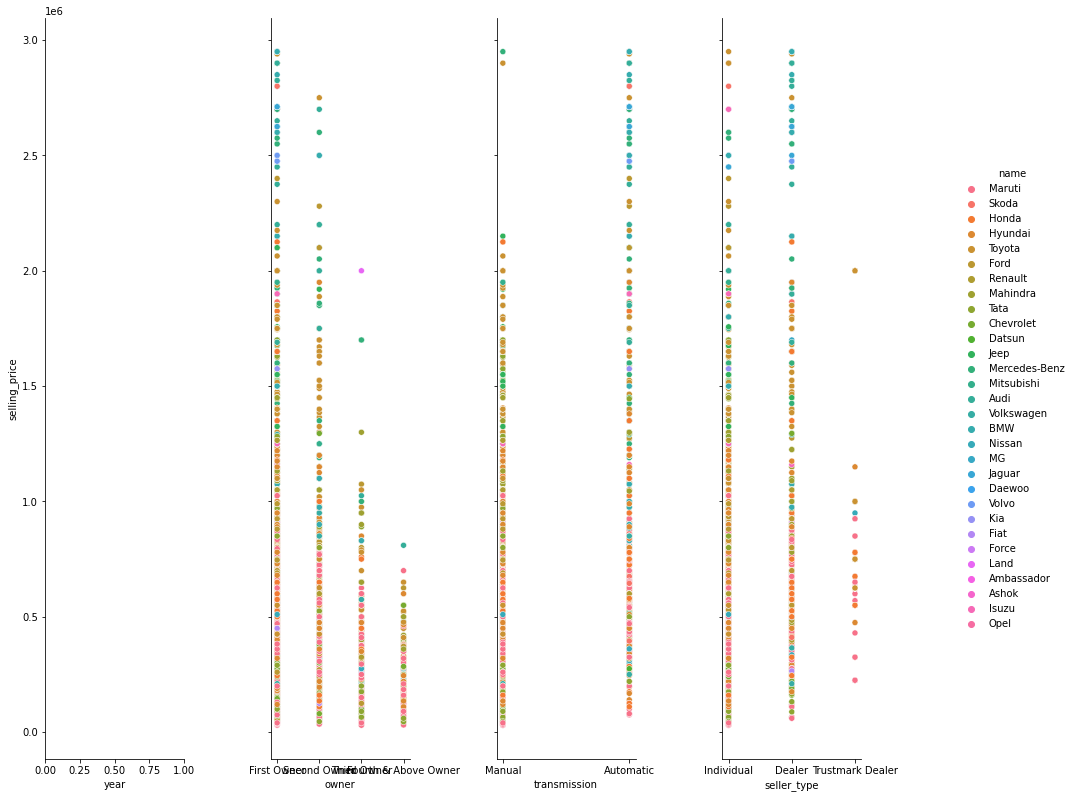

In [10]:
g = sns.pairplot(df, x_vars = ["year","owner", "transmission", "seller_type"], y_vars = ["selling_price"], hue = 'name')
g.fig.set_size_inches(15,15)

In [11]:
names = pd.get_dummies(df['name'])
seller = pd.get_dummies(df['seller_type'])
fuel = pd.get_dummies(df['fuel'])
transmission = pd.get_dummies(df['transmission'])
owners = pd.get_dummies(df['owner'])
transmission.drop(['Automatic'], axis = 1, inplace = True)

In [12]:
data = pd.concat([df, names, fuel, transmission, owners, seller], axis = 1)
display(data.head())
data.drop(['name', 'seller_type', 'owner', 'transmission', 'fuel'], axis = 1, inplace = True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Manual,First Owner,Fourth & Above Owner,Second Owner,Third Owner,Dealer,Individual,Trustmark Dealer
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,18.720,1248,74,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,16.912,1498,103.52,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,14.160,1497,78,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,18.400,1396,90,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,12.880,1298,88.2,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0


,year,selling_price,km_driven,mileage,engine,max_power,seats,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Manual,First Owner,Fourth & Above Owner,Second Owner,Third Owner,Dealer,Individual,Trustmark Dealer
0,2014,450000,145500,18.720,1248,74,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,2014,370000,120000,16.912,1498,103.52,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,2006,158000,140000,14.160,1497,78,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,2010,225000,127000,18.400,1396,90,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,2007,130000,120000,12.880,1298,88.2,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0


In [13]:
print(data.shape)
data.mileage = data.mileage.astype(float) 
data.engine = data.engine.astype(float) 
data.max_power = data.max_power.astype(float) 
data.dtypes

(7660, 49)


year                      int64
selling_price             int64
km_driven                 int64
mileage                 float64
engine                  float64
max_power               float64
seats                   float64
Ambassador                uint8
Ashok                     uint8
Audi                      uint8
BMW                       uint8
Chevrolet                 uint8
Daewoo                    uint8
Datsun                    uint8
Fiat                      uint8
Force                     uint8
Ford                      uint8
Honda                     uint8
Hyundai                   uint8
Isuzu                     uint8
Jaguar                    uint8
Jeep                      uint8
Kia                       uint8
Land                      uint8
MG                        uint8
Mahindra                  uint8
Maruti                    uint8
Mercedes-Benz             uint8
Mitsubishi                uint8
Nissan                    uint8
Opel                      uint8
Renault 

In [14]:
normalized_data=(data-data.min())/(data.max()-data.min())
print(normalized_data.shape)
y = normalized_data.selling_price
normalized_data.drop(['selling_price'], axis = 1, inplace = True)
normalized_data.head()
normalized_data = np.asarray(normalized_data)
y = np.asarray(y)
_ = len(y)
y = np.reshape(y, (_,1))

(7660, 49)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_data, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(6128, 48) (6128, 1) (1532, 48) (1532, 1)


In [17]:
def Cost_function(Y_true, Y_predicted):
    N,_ = Y_predicted.shape
    Cost = Y_true - Y_predicted
    Cost = np.square(Cost)
    Cost = np.sum(Cost)
    Cost = Cost/2/N
    return Cost

In [18]:
def Gradient_calculator(X, Y, W, b,a):
    n_samples, features = X.shape
    y_predicted = np.dot(X,W) + b
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - Y))
    db = (1 / n_samples) * np.sum(y_predicted - Y)
    W-= a*dw
    b-= a*db
    return W,b 

In [19]:
def Linear_Regression(X,Y,a,iterations):
    n_samples, features = X.shape
    Y = np.reshape(Y, (n_samples,1))
    print(Y.shape)
    W = np.zeros((features,1))
    b = 0
    for i in range(iterations):
        W,b = Gradient_calculator(X,Y,W,b,a)
        if i %1000 == 0:
            Y_predicted = np.dot(X,W) + b
            print(i , Cost_function(Y, Y_predicted))
            a = a/2
    Y_predicted = np.dot(X,W) + b
    loss = Cost_function(Y, Y_predicted)
    
    return W, b, loss

In [20]:
def predict(X,W,b):
    return np.dot(X,W)+b

In [21]:
iterations = 50000
learning_rate = 0.1
W, b, loss = Linear_Regression(X_train, Y_train, learning_rate, iterations)

(6128, 1)
0 0.014656111068765002
1000 0.0027951478115204845
2000 0.0024766357621834665
3000 0.002369237007662957
4000 0.002324578389484563
5000 0.0023041588451305954
6000 0.0022943888439587645
7000 0.0022896094099755177
8000 0.0022872455570518146
9000 0.002286070031834416
10000 0.002285483861512533
11000 0.002285191173424737
12000 0.0022850449285245853
13000 0.0022849718308448953
14000 0.0022849352881957044
15000 0.0022849170184185293
16000 0.0022849078839167667
17000 0.0022849033167625875
18000 0.002284901033209674
19000 0.0022848998914392613
20000 0.0022848993205555634
21000 0.0022848990351140887
22000 0.002284898892393447
23000 0.002284898821033104
24000 0.0022848987853529884
25000 0.00228489876751295
26000 0.0022848987585928635
27000 0.0022848987541328873
28000 0.0022848987519028677
29000 0.0022848987507878547
30000 0.00228489875023038
31000 0.0022848987499516447
32000 0.00228489874981228
33000 0.002284898749742598
34000 0.0022848987497077456
35000 0.0022848987496903142
36000 0.002

In [22]:
print(predict(X_test,W,b)[0:10])
print("$$$$$$$$$$$$$$$$")
print(Y_test[0:10])

[[0.14953736]
 [0.09320902]
 [0.04382664]
 [0.14954664]
 [0.14579083]
 [0.44360685]
 [0.14698571]
 [0.33916455]
 [0.18813944]
 [0.30221903]]
$$$$$$$$$$$$$$$$
[[0.11815099]
 [0.06678114]
 [0.04109622]
 [0.17808247]
 [0.10958935]
 [0.16609618]
 [0.1369866 ]
 [0.32363037]
 [0.14383591]
 [0.19520576]]


In [23]:
print("Cost of Train data: ", Cost_function(Y_train,predict(X_train,W,b)))
print("Cost of Test data: ", Cost_function(Y_test,predict(X_test,W,b)))

Cost of Train data:  0.00228489874967295
Cost of Test data:  0.0021156104381677703
